In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import random
from sklearn.utils import shuffle
import ntpath
import imgaug.augmenters as iaa
from matplotlib.image import imread


In [20]:
pip install imgaug

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 5.8 MB/s eta 0:00:0000:0100:01
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#device = "cuda" if torch.cuda.is_available else "cpu"
device = "cpu"
device

'cpu'

# loading the data

In [3]:
# downloading the data

!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [3]:
datadir = "track"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(datadir,"driving_log.csv"), names = columns)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [4]:
pd.set_option("display.max_colwidth", 1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [5]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail



In [6]:
data["center"] = data["center"].apply(path_leaf)
data["left"] = data["left"].apply(path_leaf)
data["right"] = data["right"].apply(path_leaf)

data

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg,0.0,0.0,0.0,26.017680
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg,0.0,0.0,0.0,25.808640
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg,0.0,0.0,0.0,25.652960
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg,0.0,0.0,0.0,25.446850


In [168]:
def plot(data, position):
    random_numbers = [random.randint(0, 4052) for _ in range(5)]
    
    plt.figure(figsize = (15,10))
    Image_folder = "track/IMG"
    for i in random_numbers:
        img_path = os.path.join(Image_folder, data[position][i])
        img = cv2.imread(img_path)
        
        if img is not None:
            cv2.imshow(f"sterring: {data['steering'][i]}, speed {data['speed'][i]} ", img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f" Cannot load the image")

In [9]:
#plot(data, "center")

2024-11-02 19:25:44.922 python[1585:26422] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-02 19:25:44.922 python[1585:26422] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


<Figure size 1500x1000 with 0 Axes>

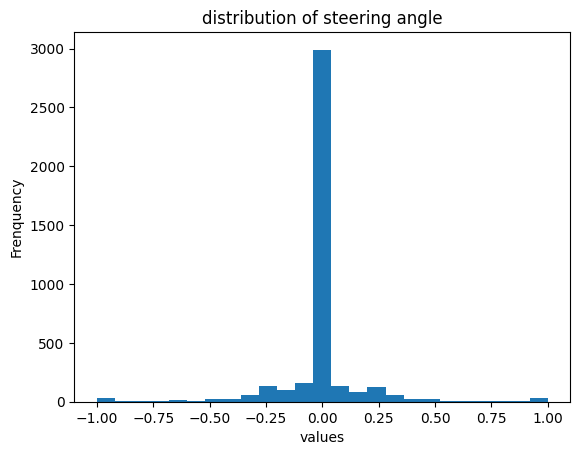

In [169]:
plt.hist(data["steering"], bins = 25)
plt.title("distribution of steering angle")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

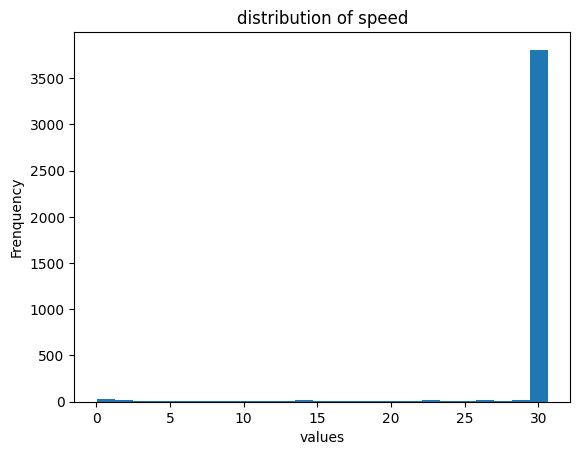

In [170]:
plt.hist(data["speed"], bins = 25)
plt.title("distribution of speed")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

In [171]:
mask = data[data["steering"] == 0]

sampled_data = mask.sample(n=500, random_state = 1)
sampled_data

,center,left,right,steering,throttle,reverse,speed
1583,center_2018_07_16_17_13_37_106.jpg,left_2018_07_16_17_13_37_106.jpg,right_2018_07_16_17_13_37_106.jpg,0.0,0.0,0.0,22.84739
296,center_2018_07_16_17_12_05_084.jpg,left_2018_07_16_17_12_05_084.jpg,right_2018_07_16_17_12_05_084.jpg,0.0,1.0,0.0,30.19031
3108,center_2018_07_16_17_15_25_216.jpg,left_2018_07_16_17_15_25_216.jpg,right_2018_07_16_17_15_25_216.jpg,0.0,1.0,0.0,30.19028
104,center_2018_07_16_17_11_51_402.jpg,left_2018_07_16_17_11_51_402.jpg,right_2018_07_16_17_11_51_402.jpg,0.0,1.0,0.0,30.18862
3492,center_2018_07_16_17_15_52_259.jpg,left_2018_07_16_17_15_52_259.jpg,right_2018_07_16_17_15_52_259.jpg,0.0,1.0,0.0,30.18954
...,...,...,...,...,...,...,...
1701,center_2018_07_16_17_13_45_473.jpg,left_2018_07_16_17_13_45_473.jpg,right_2018_07_16_17_13_45_473.jpg,0.0,1.0,0.0,30.18454
3702,center_2018_07_16_17_16_07_022.jpg,left_2018_07_16_17_16_07_022.jpg,right_2018_07_16_17_16_07_022.jpg,0.0,1.0,0.0,30.18851
1180,center_2018_07_16_17_13_08_511.jpg,left_2018_07_16_17_13_08_511.jpg,right_2018_07_16_17_13_08_511.jpg,0.0,1.0,0.0,30.19024
2954,center_2018_07_16_17_15_14_170.jpg,left_2018_07_16_17_15_14_170.jpg,right_2018_07_16_17_15_14_170.jpg,0.0,1.0,0.0,30.19030


In [191]:
final_data = pd.concat([sampled_data, data[data["steering"] != 0]]).reset_index(drop=True)
final_data

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_13_37_106.jpg,left_2018_07_16_17_13_37_106.jpg,right_2018_07_16_17_13_37_106.jpg,0.000000,0.000000,0.0,22.84739
1,center_2018_07_16_17_12_05_084.jpg,left_2018_07_16_17_12_05_084.jpg,right_2018_07_16_17_12_05_084.jpg,0.000000,1.000000,0.0,30.19031
2,center_2018_07_16_17_15_25_216.jpg,left_2018_07_16_17_15_25_216.jpg,right_2018_07_16_17_15_25_216.jpg,0.000000,1.000000,0.0,30.19028
3,center_2018_07_16_17_11_51_402.jpg,left_2018_07_16_17_11_51_402.jpg,right_2018_07_16_17_11_51_402.jpg,0.000000,1.000000,0.0,30.18862
4,center_2018_07_16_17_15_52_259.jpg,left_2018_07_16_17_15_52_259.jpg,right_2018_07_16_17_15_52_259.jpg,0.000000,1.000000,0.0,30.18954
...,...,...,...,...,...,...,...
1621,center_2018_07_16_17_16_29_116.jpg,left_2018_07_16_17_16_29_116.jpg,right_2018_07_16_17_16_29_116.jpg,-0.277988,1.000000,0.0,30.16933
1622,center_2018_07_16_17_16_29_186.jpg,left_2018_07_16_17_16_29_186.jpg,right_2018_07_16_17_16_29_186.jpg,-0.047584,1.000000,0.0,30.19039
1623,center_2018_07_16_17_16_29_691.jpg,left_2018_07_16_17_16_29_691.jpg,right_2018_07_16_17_16_29_691.jpg,0.150000,1.000000,0.0,30.18400
1624,center_2018_07_16_17_16_29_761.jpg,left_2018_07_16_17_16_29_761.jpg,right_2018_07_16_17_16_29_761.jpg,0.300000,1.000000,0.0,30.16918


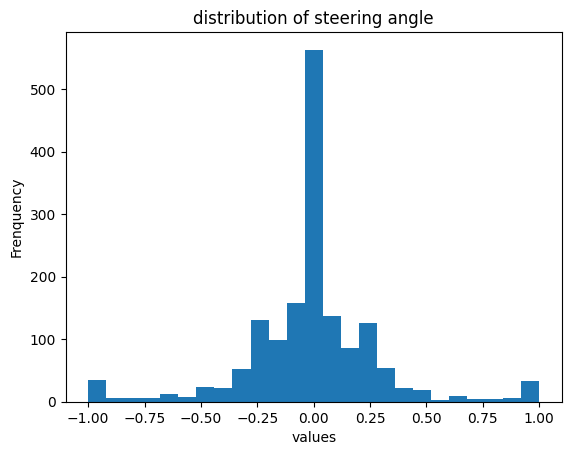

In [173]:
plt.hist(final_data["steering"], bins =25)
plt.title("distribution of steering angle")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

# Data augmentation

In [249]:
def flip_horizontale(image, steering_angle):
    #img = cv2.imread(image_path)
    
    img_flip = cv2.flip(image, 1)
    #img_flip = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)  # Conversion en RGB

    return img_flip, -steering_angle

        
def zoom(image):
    #image = cv2.imread(image_path)

    zoom = iaa.Affine(scale = (1,1.3))
    image_zoom = zoom.augment_image(image)
    
    return image_zoom

def pan(image):
    #image = cv2.imread(image)

    pan = iaa.Affine(translate_percent = {"x": (-0.1,0.1), "y": (-0.1,0.1)})
    image_pan = pan.augment_image(image)

    return image_pan

def brightness(image):
    #image = cv2.imread(image_path)

    brightness = iaa.Multiply((0.2,1.2))
    image_bri = brightness.augment_image(image)
    #image_bri = cv2.cvtColor(image_bri, cv2.COLOR_BGR2RGB)  # Conversion en RGB

    return image_bri

In [250]:
def augment(image_path, steering_angle):
    image = cv2.imread(image_path)

    if random.uniform(0,1) > 0.5:
        image, steering_angle = flip_horizontale(image, steering_angle)

    if random.uniform(0,1) > 0.5:
        image = brightness(image)

    if random.uniform(0,1) > 0.5:
        image = pan(image)

    if random.uniform(0,1) > 0.5:
        image = zoom(image)
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversion en RGB


    return image, steering_angle

In [251]:
def plot_original_augment(data):
    random_numbers = [random.randint(0,1000) for _ in range(2)]
    
    Image_folder = "track/IMG"
    
    plt.figure(figsize = (15,10))
    
    for idx, i in enumerate(random_numbers):
        img_path = os.path.join(Image_folder, data["center"][i])
        
        original_image = imread(img_path)
        
        augmented_image, _ = augment(img_path, 0)

        # plot original Image
        plt.subplot(5, 2, idx * 2 + 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis('off')
        
        # plot  augmented Image
        plt.subplot(5, 2, idx * 2 + 2)
        plt.imshow(augmented_image)
        plt.title(" Augmented Image")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


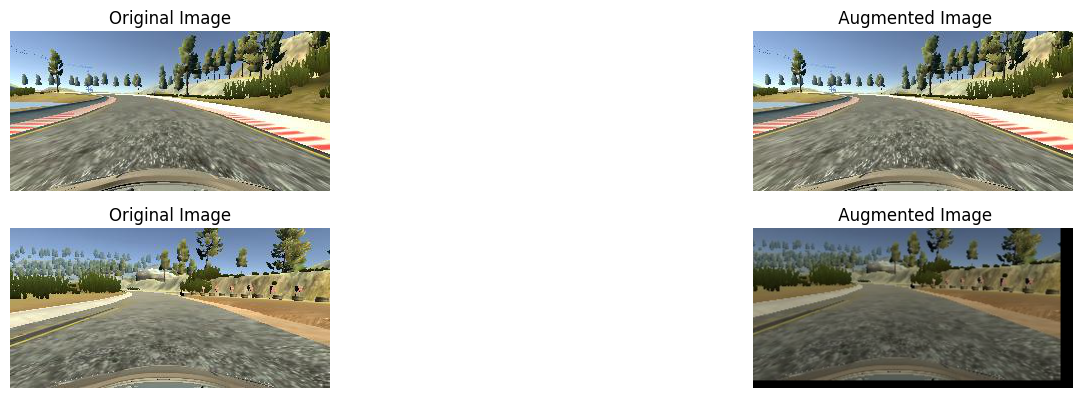

In [269]:
plot_original_augment(data)

In [128]:
data_X = data.drop(columns = ["steering", "speed","throttle", "reverse"])
data_X

,center,left,right
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg
...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg


In [133]:
data_y = data[["steering", "speed"]]
data_y

,steering,speed
0,0.0,0.649786
1,0.0,0.627942
2,0.0,0.622910
3,0.0,0.619162
4,0.0,0.615438
...,...,...
4048,0.0,26.017680
4049,0.0,25.808640
4050,0.0,25.652960
4051,0.0,25.446850


In [279]:
def Load_img(directory, data):
    image_path = []
    steering_speed = []
    
    Image_folder =  directory + "/IMG"
    
    columns = ["center", "left", "right"]
    
    for position in columns:
        for i in range(len(data)):

            image_path.append(os.path.join(Image_folder, data[position][i]))
            steering_speed.append(data.loc[i, ["steering", "speed"]].tolist())

    return image_path, steering_speed
    

In [589]:
image_paths, steering_speed = Load_img("track",data)


In [590]:
print(len(image_paths),len(steering_speed))

12159 12159


In [591]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steering_speed, test_size=0.2, random_state= 42)

In [511]:
print(f" X_train size: {len(X_train)}, X_test shape: {len(X_test)}")

 X_train size: 3902, X_test shape: 976


In [508]:
y_train

[[1.0, 7.230268],
 [-0.1991906, 30.18986],
 [0.1543404, 30.19276],
 [-0.05, 30.18969],
 [0.5000001, 30.14528],
 [0.1764077, 30.18216],
 [0.4, 30.15967],
 [-0.05, 30.18974],
 [-0.6880319, 30.14904],
 [0.7, 30.12092],
 [0.0, 30.19031],
 [-0.05, 30.18972],
 [0.9391681, 9.093032],
 [-0.2441745, 30.19755],
 [-0.114636, 30.19189],
 [0.0, 30.19028],
 [0.2, 30.17986],
 [0.0, 30.19036],
 [0.0, 30.1898],
 [-0.1069531, 30.19039],
 [0.0, 30.19029],
 [0.0, 30.19036],
 [0.0, 30.19014],
 [-0.2066837, 30.19646],
 [0.1, 30.18467],
 [0.1, 30.18768],
 [-0.2, 30.1762],
 [0.04216526, 30.19048],
 [-0.15, 30.18425],
 [-0.03961691, 30.18955],
 [0.0, 30.19031],
 [0.0, 30.19043],
 [0.0, 30.19031],
 [0.0, 30.19027],
 [0.0, 30.19059],
 [0.0, 30.19032],
 [0.0, 30.1903],
 [-0.4610696, 30.20301],
 [0.05, 30.18962],
 [-0.45, 30.15124],
 [0.0, 30.19029],
 [-0.1, 30.1872],
 [0.4117432, 30.15468],
 [-0.05, 30.19041],
 [-0.07464351, 28.21035],
 [0.0, 30.19031],
 [0.0, 0.3046698],
 [0.25, 30.17466],
 [0.0, 30.19014],
 [0.

# Image preprocess

In [306]:
def img_preprocess(img):
    img = img[60:135, :, :]
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    
    img = cv2.GaussianBlur(img, (3,3), 0)
    
    img = cv2.resize(img, (200,66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocess Image')

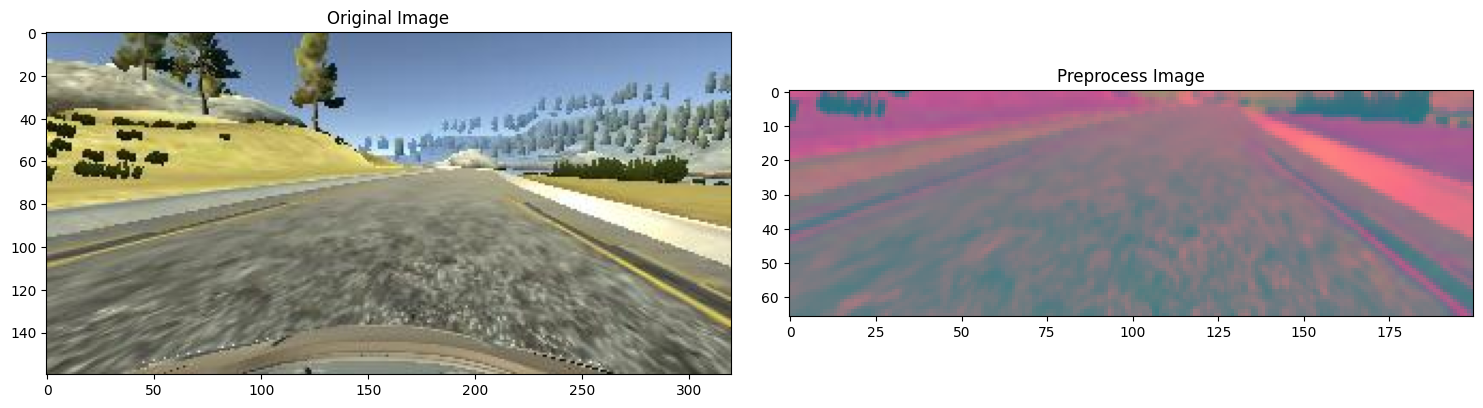

In [575]:
random_numb = random.randint(0, len(image_paths)-1)

img_original = cv2.imread(image_paths[random_numb])
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)  # Conversion en RGB

img = img_preprocess(img_original)

fig, axs = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

axs[0].imshow(img_original)
axs[0].set_title("Original Image")

axs[1].imshow(img)
axs[1].set_title("Preprocess Image")


In [441]:
def batch_generator(image_paths, steering_speed, batch_size, is_training):
    images = []
    labels = []

    while len(images) < batch_size:
        idx = random.randint(0, len(image_paths) - 1)
        image_path = image_paths[idx]
        
        steering, speed = steering_speed[idx]

        # data augmentation only on trainning mode
        if is_training:
            image, steering = augment(image_path, steering)
        else:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image = img_preprocess(image)
        images.append(image)
        labels.append([steering, speed])

    images = np.array(images)
    labels = np.array(labels, dtype=np.float32)

    yield images, labels

In [520]:
def batch_generator(image_paths, steering_speed, batch_size, is_training):
    while True:  # Générateur infini
        indices = np.random.choice(len(image_paths), batch_size, replace=False)  # Tirage sans remplacement
        images = []
        label1 = []
        label2 = []
        
        for idx in indices:
            image_path = image_paths[idx]
            steering, speed = steering_speed[idx]

            # Data augmentation seulement en mode entraînement
            if is_training:
                image, steering = augment(image_path, steering)
            else:
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            image = img_preprocess(image)
            images.append(image)
            
            label1.append(steering)
            label2.append(speed)

        images = np.array(images)
        label1 = np.array(label1, dtype=np.float32)
        label2 = np.array(label2, dtype=np.float32)

        yield images, label1, label2

In [485]:
def to_tensor(my_list):
    transform_list = torch.tensor(my_list)
    
    transform_list = transform_list.permute(0, 3, 1, 2)
    
    transform_list = transform_list.to(torch.float32)
    
    transform_list = transform_list.to(device) 

    return transform_list

In [467]:
x_train_g, y_train_1, y_train_2 = next(batch_generator(image_paths, steering_speed, 16, 1))
x_test_g, y_test_1, y_test_2 = next(batch_generator(image_paths, steering_speed, 1, 0))


In [512]:
x_train_g, y_train_1, y_train_2 = next(batch_generator(X_train, y_train, 16, 1))


3902


In [555]:
print(x_train_g.shape)

torch.Size([16, 200, 3, 66])


Text(0.5, 1.0, 'Testing Image')

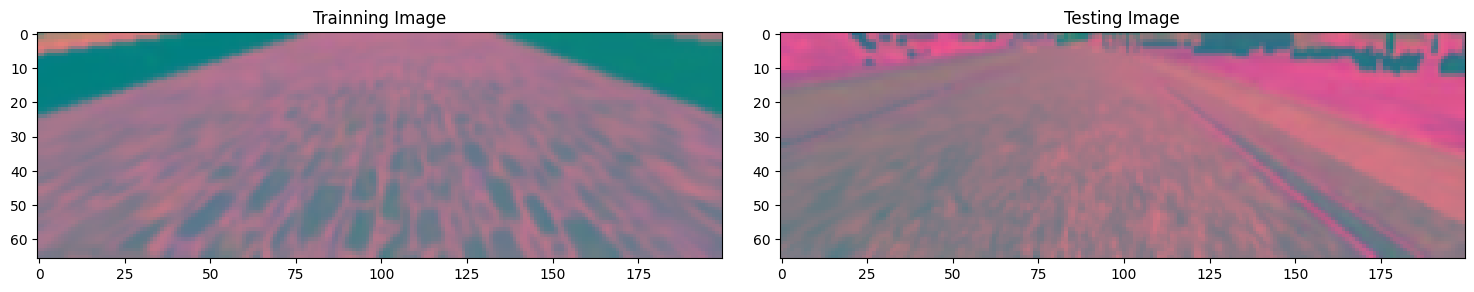

In [514]:
fig, axs = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

axs[0].imshow(x_train_g[0])
axs[0].set_title("Trainning Image")

axs[1].imshow(x_test_g[0])
axs[1].set_title("Testing Image")


In [318]:
x_train_g[0].shape

(66, 200, 3)

In [540]:
class Nvidia(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3),
            nn.ELU(),
            nn.Conv2d(64, 64, 3),
            nn.Dropout(0.5)
        )
        self.linear_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*18, out_features=100),
            nn.ELU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layers(x)
        #print(x.shape)
        x = self.linear_layers(x)
       # print(x.shape)
        return x



In [592]:
torch.manual_seed(42)
model_1 = Nvidia().to(device)
model_1

Nvidia(
  (conv_layers): Sequential(
    (0): Conv2d(3, 24, kernel_size=(5, 5), stride=(2, 2))
    (1): ELU(alpha=1.0)
    (2): Conv2d(24, 36, kernel_size=(5, 5), stride=(2, 2))
    (3): ELU(alpha=1.0)
    (4): Conv2d(36, 48, kernel_size=(5, 5), stride=(2, 2))
    (5): ELU(alpha=1.0)
    (6): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ELU(alpha=1.0)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): Dropout(p=0.5, inplace=False)
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=100, bias=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ELU(alpha=1.0)
    (5): Linear(in_features=50, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [525]:
x_train_g = to_tensor(x_train_g)
x_train_g.shape
len(x_train_g)

/var/folders/v4/g3pbnw695ssbs756h6208bp40000gn/T/ipykernel_1585/1422879591.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform_list = torch.tensor(my_list)


16

In [570]:
a.shape


def to_tensor_2(img):
    a = img

    a = torch.tensor(img)
    a = torch.unsqueeze(a, dim = 0)
    a = a.permute(0,3,1,2)
    a = a.to(torch.float32)
    
    return a

In [571]:

def predict_steering(img):
    # Set the model to evaluation mode
    model_1.eval()

    # Use torch.no_grad() to disable gradient calculations
    with torch.no_grad():
        # Assume X is a batch of input data (e.g., images)
        predictions = model_1((img))

    # predictions now contains the model's output for the input batch X
    return predictions

In [577]:
a = to_tensor_2(img)
float(predict_steering(a))
a.shape

torch.Size([1, 3, 66, 200])

In [578]:
torch.rand(1,2)

tensor([[0.1862, 0.0295]])

In [481]:

y_logits = model_1(x_train_g)
y_logits

tensor([[ 0.2097, -0.2921],
        [ 0.2041, -0.2952],
        [ 0.2020, -0.2967],
        [ 0.2049, -0.2923],
        [ 0.2055, -0.2862],
        [ 0.2071, -0.2911],
        [ 0.2105, -0.2914],
        [ 0.2084, -0.2870],
        [ 0.2059, -0.2904],
        [ 0.2046, -0.2952],
        [ 0.2075, -0.2959],
        [ 0.2083, -0.3054],
        [ 0.2086, -0.2994],
        [ 0.2103, -0.2849],
        [ 0.2097, -0.2869],
        [ 0.2141, -0.2948]], grad_fn=<AddmmBackward0>)

In [593]:
MseLoss = nn.MSELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.001)

In [594]:

# Set the seed and start the timer
torch.manual_seed(42)

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 5

# Create training and testing loop
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    #for batch, (X, y) in enumerate(train_dataloader):
    size = 1000
    for batch in range(size):
        X, y_steering, y_speed = next(batch_generator(X_train, y_train, 64, 1))

        X, y_steering, y_speed = to_tensor(X), torch.tensor(y_steering).to(device), torch.tensor(y_speed).to(device)
        
        model_1.train()
        # 1. Forward pass
        y_logits = model_1(X)

        # 2. Calculate loss (per batch)
        #print(f" logit_shape : {torch.squeeze(y_logits).shape}, steering_shape : {y_steering.shape}")
        loss1 = MseLoss(torch.squeeze(y_logits), y_steering)
        #loss2 = MseLoss(y_logits[:,1], y_speed)
        loss = loss1 # + loss2
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/{len(X_train)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= size

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss = 0
    size_test = 400
    model_1.eval()
    with torch.inference_mode():
        for batch in range(size_test):
            X, y_steering, y_speed = next(batch_generator(X_test, y_test, 64, 0))

            X, y_steering, y_speed = to_tensor(X), torch.tensor(y_steering).to(device), torch.tensor(y_speed).to(device)
            

            # 1. Forward pass
            test_logits = model_1(X)

            loss1 = MseLoss(torch.squeeze(test_logits), y_steering)
            #loss2 = MseLoss(test_logits[:,1], y_speed)
            loss = loss1 #+ loss2
            
            # 2. Calculate loss (accumatively)
            test_loss += loss # accumulatively add up the loss per epoch


        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= size_test


    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0
-------
Looked at 0/9727 samples
Looked at 12800/9727 samples
Looked at 25600/9727 samples
Looked at 38400/9727 samples
Looked at 51200/9727 samples

Train loss: 0.04377 | Test loss: 0.03813
Epoch: 1
-------
Looked at 0/9727 samples
Looked at 12800/9727 samples
Looked at 25600/9727 samples
Looked at 38400/9727 samples
Looked at 51200/9727 samples

Train loss: 0.03620 | Test loss: 0.03837
Epoch: 2
-------
Looked at 0/9727 samples
Looked at 12800/9727 samples
Looked at 25600/9727 samples
Looked at 38400/9727 samples
Looked at 51200/9727 samples

Train loss: 0.03687 | Test loss: 0.03726
Epoch: 3
-------
Looked at 0/9727 samples
Looked at 12800/9727 samples
Looked at 25600/9727 samples


KeyboardInterrupt: 


Train loss: 0.03378 | Test loss: 0.02636


Train loss: 0.03108 | Test loss: 0.02591

Train loss: 0.02938 | Test loss: 0.02709

Train loss: 0.02854 | Test loss: 0.03140

Train loss: 0.02705 | Test loss: 0.02221


Train loss: 0.02556 | Test loss: 0.02555

Train loss: 0.02469 | Test loss: 0.01995

Train loss: 0.02379 | Test loss: 0.02217

# saving model

In [588]:
import torch

# Enregistre uniquement les paramètres du modèle
torch.save(model_1.state_dict(), 'model_3.pth')



In [487]:
X, y_steering, y_speed = next(batch_generator(image_paths, steering_speed, 16, 1))

In [490]:
X, y_steering, y_speed = to_tensor(X), to_tensor(y_steering), to_tensor(y_speed)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 1 is not equal to len(dims) = 4

In [493]:
torch.tensor(y_steering).to(device)

tensor([-0.1764,  0.2500,  0.1500, -0.1500, -0.0000, -0.3745, -0.1224,  0.3292,
         0.0000, -0.4177,  0.0724,  0.1876,  0.1500,  1.0000, -0.0500,  0.1819])

In [494]:
y_steering

array([-0.1764287 ,  0.25      ,  0.15      , -0.15      , -0.        ,
       -0.3744849 , -0.1223666 ,  0.3291691 ,  0.        , -0.4176539 ,
        0.07241428,  0.1876292 ,  0.15      ,  1.        , -0.05      ,
        0.1818909 ], dtype=float32)